In [1]:
import os
import time

import numpy as np

from parse_input import parse_itc2007_post_enrolment, parse_itc2007_curriculum_based, parse_xml
from timetable_solver import TimetableSolver


In [2]:
itc2007_track2_path = '.\\Datasets\\post'
itc2007_track3_path = '.\\Datasets\\curriculum'
itc2019_path = '.\\Datasets\\2019'

def get_all_files(path):
    return [os.path.join(dirpath, file) for dirpath, _, filenames in os.walk(path) for file in filenames]   

itc2007_track2_files = get_all_files(itc2007_track2_path)
itc2007_track3_files = get_all_files(itc2007_track3_path)
itc2019_files = get_all_files(itc2019_path)

def parse_problem (dataset,instance_path):
    if dataset == 'itc2007_track2':
        return parse_itc2007_post_enrolment(instance_path)
    elif dataset == 'itc2007_track3':
        return parse_itc2007_curriculum_based(instance_path)
    elif dataset == 'itc2019':
        return parse_xml(instance_path)

In [3]:
graph_interval = 1

def run_experiment_for_dataset(dataset, experiment_name, repetitions, ga_params):
    
    output_path = f'output/{experiment_name}_{dataset}_{time.strftime("%Y%m%d-%H%M%S")}'
    os.makedirs(output_path)
    
    files = itc2007_track2_files if dataset == 'itc2007_track2' else itc2007_track3_files if dataset == 'itc2007_track3' else itc2019_files
    
    for file in files:
        for rep in range(repetitions):
            
            subfolder_path = os.path.join(output_path,file.split('\\')[-1].split('.')[0]+"_rep "+str(rep+1))
            os.mkdir(subfolder_path)
            
            start_time = time.time()
            
            print(f'Processing {file} ({rep+1}/{repetitions})...')
            problem_tuple = parse_problem(dataset, file)
            problem = problem_tuple[0]
            timetable_solver = TimetableSolver(problem,checkpoint_dir=os.path.join(subfolder_path,'checkpoint'),graphs_dir=os.path.join(subfolder_path,'graphs'),graphs_interval=graph_interval,**ga_params)
            
            
            timetable_solver.run()
            
            
            stats_file = open(os.path.join(subfolder_path,'stats.txt'), 'w')
            
            
            best_solution,best_cost = timetable_solver.get_best_solution()
            
            stats_file.write(f'Best solution cost: {best_cost}\n')
            
            end_time = time.time()
            stats_file.write(f'Execution time: {end_time-start_time} seconds\n')
            
            stats_file.close()

Processing .\Datasets\2019\1.early\agh-fis-spr17.xml (1/1)...
Class 1 was moved making the new cost: (835, 16473)
Class 7 was moved making the new cost: (833, 16473)
Class 9 was moved making the new cost: (832, 16473)
Class 11 was moved making the new cost: (831, 16473)
Class 14 was moved making the new cost: (830, 16473)
Class 16 was moved making the new cost: (829, 16473)
Class 19 was moved making the new cost: (828, 16481)
Class 20 was moved making the new cost: (827, 16485)
Class 21 was moved making the new cost: (822, 16485)
Class 22 was moved making the new cost: (821, 16453)
Class 23 was moved making the new cost: (820, 16453)
Class 24 was moved making the new cost: (818, 16453)
Class 25 was moved making the new cost: (817, 16453)
Class 26 was moved making the new cost: (816, 16453)
Class 28 was moved making the new cost: (815, 16453)
Class 29 was moved making the new cost: (814, 16450)
Class 31 was moved making the new cost: (813, 16462)
Class 33 was moved making the new cost: 

KeyboardInterrupt: 

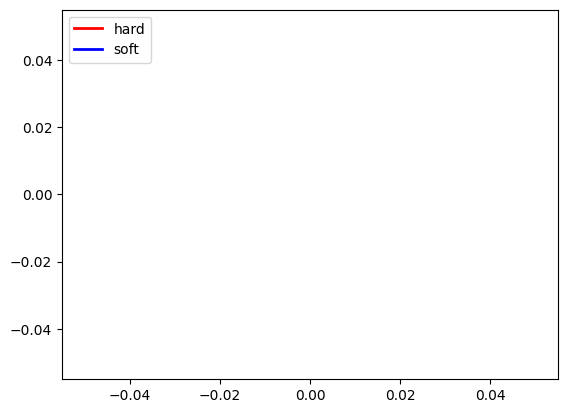

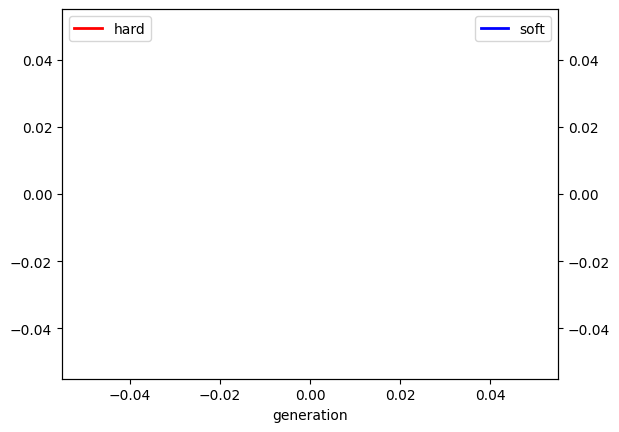

In [5]:
run_experiment_for_dataset('itc2019', 'itc2007_track3 with random construction and 1k generations', 1, {'population_size': 50, 'no_of_generations': 100, 'first_population_method': "random", 'crossover_ratio': 0.8, 'mutation_chance': 0.2,'local_search':True})

run_experiment_for_dataset('itc2019', 'itc2007_track3 with dfs construction and 1k generations', 1, {'population_size': 50, 'no_of_generations': 100, 'first_population_method': "dfs", 'crossover_ratio': 0.8, 'mutation_chance': 0.2,'local_search':True})